In [ ]:
%matplotlib inline

### NumPy 

Во всех заданиях данного раздела запрещено использовать циклы. Под матрицей в данных заданиях понимается двумерный numpy.array.

In [ ]:
import numpy as np

**1.** Реализуйте функцию, принимающую на вход матрицу X и два массива i и j одинаковой длины и возвращающую вектор np.array, состоящий из последовательности элементов [X[i[0], j[0]], X[i[1], j[1]], ..., X[i[N-1], j[N-1]]].

In [ ]:
def construct_array(X, i, j):
    return np.hstack(X[[i],[j]])

In [ ]:
X = np.asarray([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
i = np.asarray([0, 1, 2])
j = np.asarray([0, 1, 2])
construct_array(X, i, j)

array([1, 5, 9])

**2.** Написать функцию для подсчёта произведения ненулевых элементов на диагонали прямоугольной матрицы.
Например, для X = np.array([[1, 0, 1], [2, 0, 2], [3, 0, 3], [4, 4, 4]]) ответом является 3. Если ненулевых элементов нет, функция должна возвращать None.

In [ ]:
def nonzero_product(X):
    dig = np.diagonal(X)
    if len(dig[dig.nonzero()]) > 0:
        return np.multiply.reduce(dig[dig.nonzero()])
    else:
        return "None" 

In [ ]:
X = np.array([[1, 0, 1], [2, 0, 2], [3, 0, 3], [4, 4, 4]])
nonzero_product(X)

3

In [ ]:
X = np.array([[0, 1, 1], [2, 0, 2], [3, 1, 0], [4, 4, 4]])
nonzero_product(X)

'None'

**3.** Написать функцию, возвращающую максимальный элемент в векторе x среди элементов, перед которыми стоит нулевой. Для x = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0]) ответом является 5. Если таких элементов нет, функция должна возвращать None.

In [ ]:
def max_element(arr):
    zero = arr == 0
    if len(arr[1:][zero[:-1]]) > 0:
        return arr[1:][zero[:-1]].max()
    else:
        return "None"

In [ ]:
x = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0])
max_element(x)

5

In [ ]:
x = np.array([6, 2, 1, 3, 1, 1, 5, 7, 1])
max_element(x)

'None'

**4.** Реализуйте функцию, принимающую на вход матрицу и некоторое число и возвращающую ближайший к числу элемент матрицы. Например: для X = np.arange(0,10).reshape((2, 5)) и v = 3.6 ответом будет 4.

In [ ]:
def nearest_value(X, v):
    return np.argmin(np.abs(X-v))

In [ ]:
X = np.arange(0,10).reshape((2, 5))
v = 3.6
nearest_value(X, v)

4

**5.** Написать функцию, которая получает на вход матрицу и масштабирует каждый её столбец, а именно вычитает из столбца его среднее значение и делит столбец на стандартное отклонение. Для тестирования можно сгенерировать с помощью метода numpy.random.randint случайную матрицу и проверить на ней работу метода.  Убедитесь, что в функции не будет происходить деления на ноль. 

In [ ]:
def scale(X):
    mean = np.mean(X, axis=0)
    std = np.std(X, axis=0)
    try:
        return (X - mean) / std
    except ZeroDivisionError:
        print("You cannot divide by zero!")

In [ ]:
X = np.random.randint(0, 10, (3, 5))
scale(X)

array([[ 1.06904497,  1.22474487,  1.41421356, -1.41421356, -1.41421356],
       [-1.33630621,  0.        , -0.70710678,  0.70710678,  0.70710678],
       [ 0.26726124, -1.22474487, -0.70710678,  0.70710678,  0.70710678]])

**6.** Реализуйте функцию, которая для заданной матрицы находит:
 - определитель
 - след
 - наименьший и наибольший элементы
 - норму Фробениуса
 - собственные числа
 - обратную матрицу


Для тестирования сгенерируйте матрицу с элементами из нормального распределения $N$(10,1)

In [ ]:
def get_stats(X):
    stat = {}
    stat['определитель'] = np.linalg.det(X)
    stat['след'] = np.trace(X)
    stat['наименьший и наибольший элементы'] = tuple((X.flat[X.argmin()], X.flat[X.argmax()]))
    stat['норма Фробениуса'] = np.linalg.norm(X, ord = "fro")
    stat['собственные числа'] = np.linalg.eig(X)[0]
    stat['обратная матрица'] = np.linalg.inv(X)
    return stat

In [ ]:
X = np.random.normal(10, 1, (3,3))
print(X)
get_stats(X)

[[10.35748613  9.029072   11.7245324 ]
 [ 9.12819285 11.04797285  9.87906503]
 [11.93457585  8.69478758  9.48888864]]


{'определитель': -136.74444662320442,
 'след': 30.89434761733938,
 'наименьший и наибольший элементы': (8.694787576564194, 11.93457584993214),
 'норма Фробениуса': 30.615621730218095,
 'собственные числа': array([30.44126146, -1.90498157,  2.35806773]),
 'обратная матрица': array([[-0.13848176, -0.11895518,  0.2949555 ],
        [-0.22879207,  0.30455561, -0.03438175],
        [ 0.38381941, -0.12945318, -0.23408713]])}

In [ ]:
X = ...
get_stats(X)

{'определитель': 11.229255800082077,
 'след': 31.861082036331997,
 'наименьший и наибольший элементы': (9.409682760900868, 11.179471067836925),
 'норма Фробениуса': 30.482879623796595,
 'собственные числа': array([30.44908215,  0.34593338,  1.06606651]),
 'обратная матрица': array([[ 2.01476982, -1.09661606, -0.87835649],
        [-0.48868976,  0.7330548 , -0.23559114],
        [-1.42132894,  0.35770376,  1.11377488]])}

### Pandas

Загрузите данные о пассажирах Титаника из файла *titanic.csv* и ответьте на следующие вопросы:

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('src_titanic.csv')

**1.** Опишите данный датасет: какое распределение женщин/мужчин в нем? Сколько пассажиров ехало каким классом? Какой средний/минимальный/максимальный возраст пассажиров? Что можно сказать о количестве выживших пассажиров?

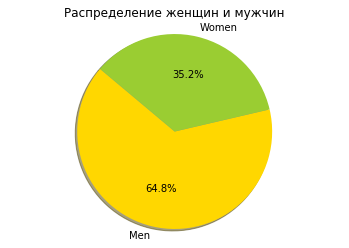

In [ ]:
labels = 'Men', 'Women'
sizes = df.Sex.value_counts()
colors = ['gold', 'yellowgreen']
plt.pie(sizes, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title('Распределение женщин и мужчин')
plt.show()

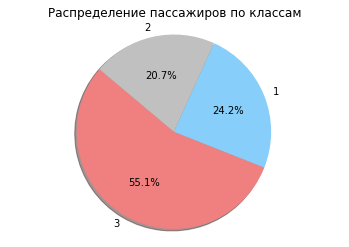

In [ ]:
labels = "3", "1", "2"
sizes = df.Pclass.value_counts()
colors = ['lightcoral', 'lightskyblue', 'silver']
plt.pie(sizes, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title('Распределение пассажиров по классам')
plt.show()

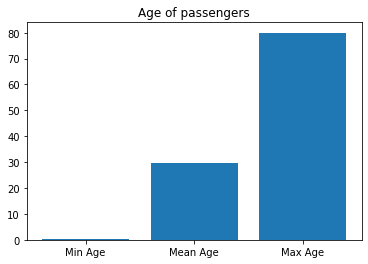

In [ ]:
labels = ('Min Age', "Mean Age", "Max Age")
values = [df.Age.min(), df.Age.mean(), df.Age.max()]
plt.bar(labels, values)
plt.title('Age of passengers')
plt.show()

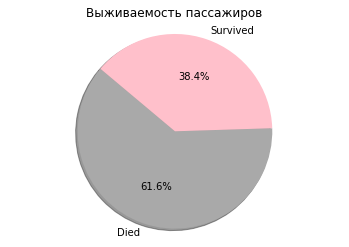

In [ ]:
labels = 'Died', 'Survived'
sizes = df.Survived.value_counts()
colors = ['darkgrey', 'pink']
plt.pie(sizes, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title('Выживаемость пассажиров')
plt.show()

**2.** Верно ли, что женщины выживали чаще мужчин? Какие пассажиры выживали чаще: с более дешевыми или дорогими билетами? Верно ли, что чаще выживали более молодые пассажиры?

# Верно ли, что женщины выживали чаще мужчин? 

Да, верно.

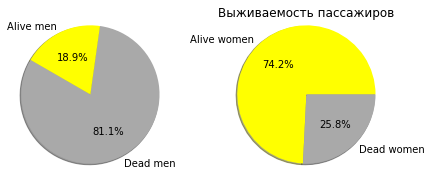

In [ ]:
labels = 'Dead men', 'Alive men'
labels2 = "Alive women", "Dead women"
sizes1 = df[(df['Sex'] == 'male')].Survived.value_counts()
sizes2 = df[(df['Sex'] == 'female')].Survived.value_counts()

fig = plt.figure()
ax1 = fig.add_axes([0, 0, .5, .5], aspect=1)
ax1.pie(sizes1, labels=labels, radius = 1.2, colors = ["darkgrey", "yellow"], autopct='%1.1f%%', shadow=True, startangle=150)
ax2 = fig.add_axes([.5, .0, .5, .5], aspect=1)
ax2.pie(sizes2, labels=labels2, radius = 1.2, colors = ["yellow", "darkgrey"], autopct='%1.1f%%', shadow=True, startangle=0)
plt.title('Выживаемость пассажиров')
plt.show()

# Какие пассажиры выживали чаще: с более дешевыми или дорогими билетами?

Если отталкиваться от медианной цены за билеты, то чаще выживали пассажиры с более дорогими билетами.

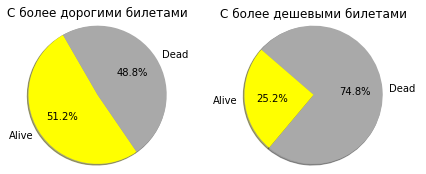

In [ ]:
labels = 'Alive', 'Dead'
labels2 = "Dead ", "Alive"
sizes1 = df[(df['Fare'] >= df.Fare.median())].Survived.value_counts()
sizes2 = df[(df['Fare'] < df.Fare.median())].Survived.value_counts()

fig = plt.figure()
ax1 = fig.add_axes([0, 0, .5, .5], aspect=1)
ax1.pie(sizes1, labels=labels, radius = 1.2, colors = ["yellow", "darkgrey"], autopct='%1.1f%%', shadow=True, startangle=120)
ax1.title.set_text("С более дорогими билетами")
ax2 = fig.add_axes([.5, .0, .5, .5], aspect=1)
ax2.pie(sizes2, labels=labels2, radius = 1.2, colors = ["darkgrey", "yellow"], autopct='%1.1f%%', shadow=True, startangle=230)
ax2.title.set_text("С более дешевыми билетами")
plt.show()

# Верно ли, что чаще выживали более молодые пассажиры?

Аналогично, если отталкиваться от среднего возраста, то неверно. Возраст не сыграл особой роли.

(Очень странное совпадение значений, однако....)

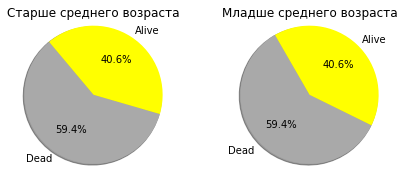

In [ ]:
labels = 'Dead', 'Alive'
labels2 = "Dead ", "Alive"
sizes1 = df[(df['Age'] >= df.Age.mean())].Survived.value_counts()
sizes2 = df[(df['Age'] < df.Age.mean())].Survived.value_counts()

fig = plt.figure()
ax1 = fig.add_axes([0, 0, .5, .5], aspect=1)
ax1.pie(sizes1, labels=labels, radius = 1.2, colors = ["darkgrey", "yellow"], autopct='%1.1f%%', shadow=True, startangle=130)
ax1.title.set_text("Старше среднего возраста")
ax2 = fig.add_axes([.5, .0, .5, .5], aspect=1)
ax2.pie(sizes2, labels=labels2, radius = 1.2, colors = ["darkgrey", "yellow"], autopct='%1.1f%%', shadow=True, startangle=120)
ax2.title.set_text("Младше среднего возраста")
plt.show()

In [ ]:
df[(df['Age'] >= df.Age.mean())].Survived.value_counts()

0    196
1    134
Name: Survived, dtype: int64

In [ ]:
df[(df['Age'] < df.Age.mean())].Survived.value_counts()

0    228
1    156
Name: Survived, dtype: int64

**3.** Найдите все признаки, для которых есть пропуски в данных. Обычно алгоритмы по умолчанию не умеют обрабатывать такие данные. Предложите способы обработки данных с пропусками (не менее двух) и укажите их достоинства/недостаки каждого. Проиллюстрируйте их на примере данного датасета.

In [ ]:
 df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# Пропуски имеют признаки "Age", "Cabin" and "Embarked". 
 
Способы обработки данных с пропусками:
 
 1) Исключение строк с наличием пропусков:
 1.1 Удаление всех респондентов с пропущенными данными (listwise deletion). При вычислении сложных моделей с большим числом переменных этот метод может привести к большому объему исключенных наблюдений, в ряде случаев до двух третей исходного массива данных.
 1.2 Переменные для наблюдений с пропущенными значениями не включаются в проводимый анализ по необходимости (рairwise deletion). 
 Легко реализуем, но может применяться лишь при незначительном количестве пропущенных данных, иначе полученные на выходе данные становятся нерепрезентативными. В данном датасете можно было применить к признаку "Embarked", поскольку в нем минимальное количество пропусков, и возможно к "Age". 
 
 2) Заполнение пропусков средними по столбцу значениями. Также легко реализовать, к недостаткам метода относят вносимые искажения в распределения данных, уменьшение дисперсии. Этот метод дает лучшие результаты, чем методы, основанные на исключении наблюдений, однако он также ведет к смещенным результатам. Было бы применимо к признаку "Age", если бы нахождение корреляции этого признака с каким-либо другим не было бы первостепенной задачей анализа.
 
 3) Метод хот-дек (hot deck). Сортировка респондентов по ключевым переменным, тогда респонденты со схожими ответами находятся
рядом друг с другом. При восстановлении пропущенные значения переменной заимствуются из предыдущего наблюдения. Наиболее продвинутой модификацией считается хот-дек со случайным отбором значений из подгруппы схожих респондентов.
Главным недостатком метода хот-дек является наличие взаимосвязей между восстановленными значениями и занижение значений дисперсии. Снизить уровень зависимости до незначимых величин возможно лишь при очень большом числе подгрупп, что подразумевает большие объемы выборок. 
Было бы актуально для заполнения признака "Cabin" на основе признака "Pclass" (и чертежей Титаника :)).	

4) Замена пропущенных значений нулями и добавление специального атрибута-индикатора, принимающего нулевые значения для записей, где данные изначально не содержали пропусков и ненулевые значения там, где ранее были пропуски. 

К преимуществам данного метода относятся: использование всего набора данных (репрезентативность выборки не страдает), явное использование информации о пропущенных значениях. Однако, также может привести к существенному искажению результатов.
Использование возможно для любых пропущенных признаков.